# Constraint Analysis

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

C_D_0 = 0.04

## Mission

In [2]:
columns = ["Phase", "Distance", "Altitude", "Speed", "Beta"]

mission_data = pd.DataFrame([["Takeoff", 5, 150, 0.4, 1],
                             ["Climb", 50, 35000, 0.7, 0.98],
                             ["Cruise", 300, 35000, 0.7, 0.93],
                             ["Loiter", 400, 35000, 0.7, 0.86],
                             ["Descend", 75, 10000, 0.85, 0.81],
                             ["Dash", 75, 10000, 0.95, 0.74],
                             ["Climb", 30, 40000, 0.7, 0.72],
                             ["Cruise", 300, 40000, 0.7, 0.67],
                             ["Descend", 30, 5000, 0.8, 0.61],
                             ["Loiter", 20, 5000, 0.6, 0.6],
                             ["Descend", 10, 150, 0.5, 0.6],
                             ["Land", 5, 0, 0.4, 06.6]], columns=columns)
mission_data["Cumulative Distance"] = mission_data["Distance"].cumsum()
mission_data.head(100)

,Phase,Distance,Altitude,Speed,Beta,Cumulative Distance
0,Takeoff,5,150,0.40,1.00,5
1,Climb,50,35000,0.70,0.98,55
2,Cruise,300,35000,0.70,0.93,355
3,Loiter,400,35000,0.70,0.86,755
4,Descend,75,10000,0.85,0.81,830
5,Dash,75,10000,0.95,0.74,905
6,Climb,30,40000,0.70,0.72,935
7,Cruise,300,40000,0.70,0.67,1235
8,Descend,30,5000,0.80,0.61,1265
9,Loiter,20,5000,0.60,0.60,1285


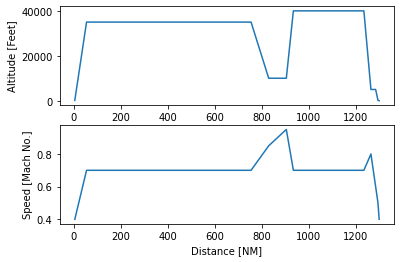

In [3]:
fig, axs = plt.subplots(2)
axs[0].plot(mission_data["Cumulative Distance"], mission_data["Altitude"])
axs[0].set_ylabel("Altitude [Feet]")
axs[1].plot(mission_data["Cumulative Distance"], mission_data["Speed"])
axs[1].set_ylabel("Speed [Mach No.]")
axs[1].set_xlabel("Distance [NM]")
plt.show()

## Constraint 1: Constant altitude and speed cruise

In [4]:
beta = 0.93
alpha = 0.6
q = 10322.25
k_1 = 0.085
W_TO = 6000 * 9.81

W_TO_initial = W_TO / 60
W_TO_end = W_TO / 14

df = pd.DataFrame()
df['W/S'] = np.linspace(W_TO_initial,W_TO_end)
df['T/W_1'] = beta/alpha * ((C_D_0)/(beta/q*df['W/S']) + k_1*beta/q*df['W/S'])

## Constraint 2: Constant speed climb

In [5]:
alpha = 0.7
beta = 0.98
q = 19616
V=322
df['T/W_2'] = beta/alpha * ((C_D_0)/(beta/q*df['W/S']) + k_1*beta/q*df['W/S'] + 1/V)

## Constraint 3: Landing

In [6]:
s_L = 200
beta = 0.6
k_L = 1.2
mu = 0.55
g = 9.81
rho = 1.225
C_L_max_land = 2.2
W_TO_S = s_L / (beta*k_L**2) * (mu*g*rho*C_L_max_land)

## Constraint 3: Takeoff

In [7]:
beta = 1
alpha = 1
k_LO = 1.2
s_G = 300
g = 9.81
rho = 1.225
C_L_max_TO = 1.8
df['T/W_3'] = beta**2/alpha * k_LO**2 / (s_G*g*rho*C_L_max_TO) * df['W/S']

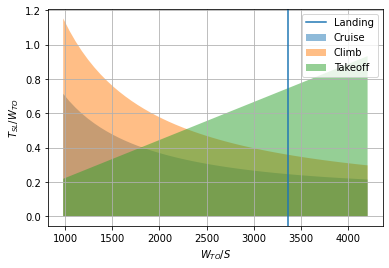

In [8]:
plt.axvline(W_TO_S, label = "Landing")
plt.fill_between(df['W/S'], df['T/W_1'], label="Cruise", alpha=0.5)
plt.fill_between(df['W/S'], df['T/W_2'], label="Climb", alpha=0.5)
plt.fill_between(df['W/S'], df['T/W_3'], label="Takeoff", alpha=0.5)
plt.xlabel('$W_{TO}/S$')
plt.ylabel('$T_{SL}/W_{TO}$')
plt.grid()
plt.legend()
plt.show()